In [1]:
import numpy as np
import matplotlib
matplotlib.use('Qt4Agg')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
from enthought.mayavi import mlab
%matplotlib inline

/sw/lib/python2.7/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

In [40]:
#Generate samples that linearly covary in 3 variables -- covariance is equal; variables have different s.d.
means = np.zeros((3))
covar = np.array([[3, 2, 2], [2, 3, 2], [2, 8, 3]])
lin_samples = np.random.multivariate_normal(mean=means, cov=covar, size=10000)

/sw/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: covariance is not positive-semidefinite.


In [4]:
#Create samples from banana shaped distribution
#Introduce nonlinear dependence between all variables
ban_samples = np.zeros(lin_samples.shape)
for i, sample in enumerate(lin_samples):
    ban_samples[i][0] = sample[0]
    ban_samples[i][1] = sample[0]**2
    ban_samples[i][2] = (sample[0]+sample[1])**2
ban_min = ban_samples.min(axis=0)
ban_range = np.ptp(ban_samples, axis=0)
lin_range = np.ptp(lin_samples, axis=0)

In [5]:
rescaled_ban_samples = ((ban_samples-ban_min)*lin_range)/ban_range

In [6]:
mean_cen_ban_samples = rescaled_ban_samples-rescaled_ban_samples.mean(axis=0)

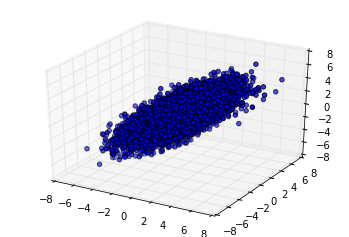

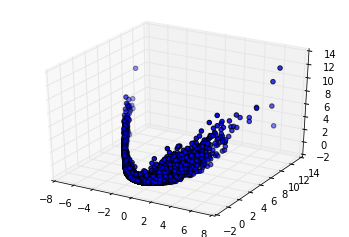

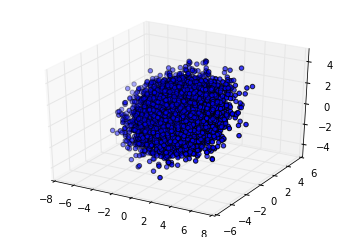

In [17]:
#Plot two sample sets
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(lin_samples[:,0], lin_samples[:,1], lin_samples[:,2])
fig = plt.figure()
ax2 = fig.add_subplot(111, projection='3d')
ax2.scatter(mean_cen_ban_samples[:,0], mean_cen_ban_samples[:,1], mean_cen_ban_samples[:,2])
fig = plt.figure()
ax3 = fig.add_subplot(111, projection='3d')
ax3.scatter(ban_approx_samples[:,0], ban_approx_samples[:,1], ban_approx_samples[:,2])

In [26]:
ban_approx_cov = np.cov(ban_approx_samples.T)
approx_aigval, approx_eigvec = np.linalg.eig(np.linalg.inv(ban_approx_cov))

In [27]:
approx_aigval

array([ 5.32250126,  0.3361153 ,  0.48864238])

In [28]:
approx_eigvec

array([[ -7.46135497e-03,  -9.99971870e-01,   7.66614854e-04],
       [ -7.12422731e-01,   5.85375724e-03,   7.01726147e-01],
       [  7.01710895e-01,  -4.68967403e-03,   7.12446368e-01]])

In [13]:
ban_eigval

array([ 5.29359038,  0.33810218,  0.47784873])

In [14]:
ban_eigvec

array([[ 0.00823323,  0.99996419,  0.00195625],
       [ 0.71157937, -0.00723325,  0.70256849],
       [-0.70255748,  0.00439238,  0.71161344]])

In [8]:
#Eigendecomposition
#In the linear case, the covariance of the samples is already known so can be used directly
eigval, eigvec = np.linalg.eig(np.linalg.inv(covar))

In [9]:
#In the banana case, the covariance matrix is calculated empirically after mean-centering the samples (done above)
ban_cov = np.cov(mean_cen_ban_samples.T)

In [10]:
ban_eigval, ban_eigvec = np.linalg.eig(np.linalg.inv(ban_cov))

In [11]:
eigval

array([ 1.        ,  0.14285714,  1.        ])

In [12]:
eigvec

array([[ 0.81649658, -0.57735027, -0.52483216],
       [-0.40824829, -0.57735027, -0.2792604 ],
       [-0.40824829, -0.57735027,  0.80409256]])

0.9761000000000002

In [15]:
eigval[np.argsort(eigval)]

array([ 0.14285714,  1.        ,  1.        ])

In [16]:
ban_approx_samples = np.random.multivariate_normal(mean=means, cov=ban_cov, size=10000)

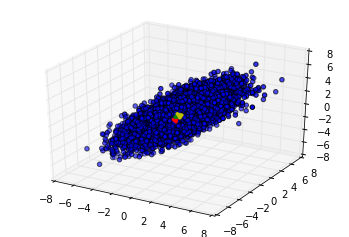

In [18]:
#Plot eigenvectors projection in original datasets
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(lin_samples[:,0], lin_samples[:,1], lin_samples[:,2])
for v,val,col in zip(eigvec[np.argsort(eigval)].T, eigval[np.argsort(eigval)], ['r', 'g', 'y']):
    a = Arrow3D([0, v[0]*val], [0, v[1]*val], 
                [0, v[2]*val], mutation_scale=10, 
                lw=3, arrowstyle="-|>", color=col)
    ax1.add_artist(a)
#ax1.view_init(90, 120)

In [24]:
# Mayavi plots
mlab.figure('Linear Relationship')
mlab.points3d(lin_samples[:,0], lin_samples[:,1], lin_samples[:,2], scale_factor=.03)
scaled_vecs = eigvec[np.argsort(eigval)]*eigval[np.argsort(eigval)]
mlab.axes(xlabel='x', ylabel='y', zlabel='z')
mlab.quiver3d(np.array([0, 0, 0]), np.array([0, 0, 0]), np.array([0, 0, 0]), scaled_vecs[:,0], scaled_vecs[:,1], scaled_vecs[:,2])
mlab.show()

In [25]:
mlab.figure('Banana Relationship')
mlab.points3d(mean_cen_ban_samples[:,0], mean_cen_ban_samples[:,1], mean_cen_ban_samples[:,2], scale_factor=.03)
scaled_vecs = ban_eigvec[np.argsort(ban_eigval)]*ban_eigval[np.argsort(ban_eigval)]
mlab.axes(xlabel='x', ylabel='y', zlabel='z')
mlab.quiver3d(np.array([0, 0, 0]), np.array([0, 0, 0]), np.array([0, 0, 0]), scaled_vecs[:,0], scaled_vecs[:,1], scaled_vecs[:,2])
mlab.show()

In [29]:
mlab.figure('Linearly Approximated Banana Relationship')
mlab.points3d(ban_approx_samples[:,0], ban_approx_samples[:,1], ban_approx_samples[:,2], scale_factor=.03)
scaled_vecs = ban_eigvec[np.argsort(ban_eigval)]*ban_eigval[np.argsort(ban_eigval)]
mlab.axes(xlabel='x', ylabel='y', zlabel='z')
mlab.quiver3d(np.array([0, 0, 0]), np.array([0, 0, 0]), np.array([0, 0, 0]), scaled_vecs[:,0], scaled_vecs[:,1], scaled_vecs[:,2])
mlab.show()